In [1]:
import pandas as pd

# Federal Reserve dataset: https://www.kaggle.com/federalreserve/interest-rates

In [2]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
# plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig



In [3]:
import os
def dscovr_df(filename):
    df = pd.read_csv(os.path.join(os.path.curdir, "data", filename))
    df = df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])
    df.index = df["0"]
    return df.drop(columns="0")

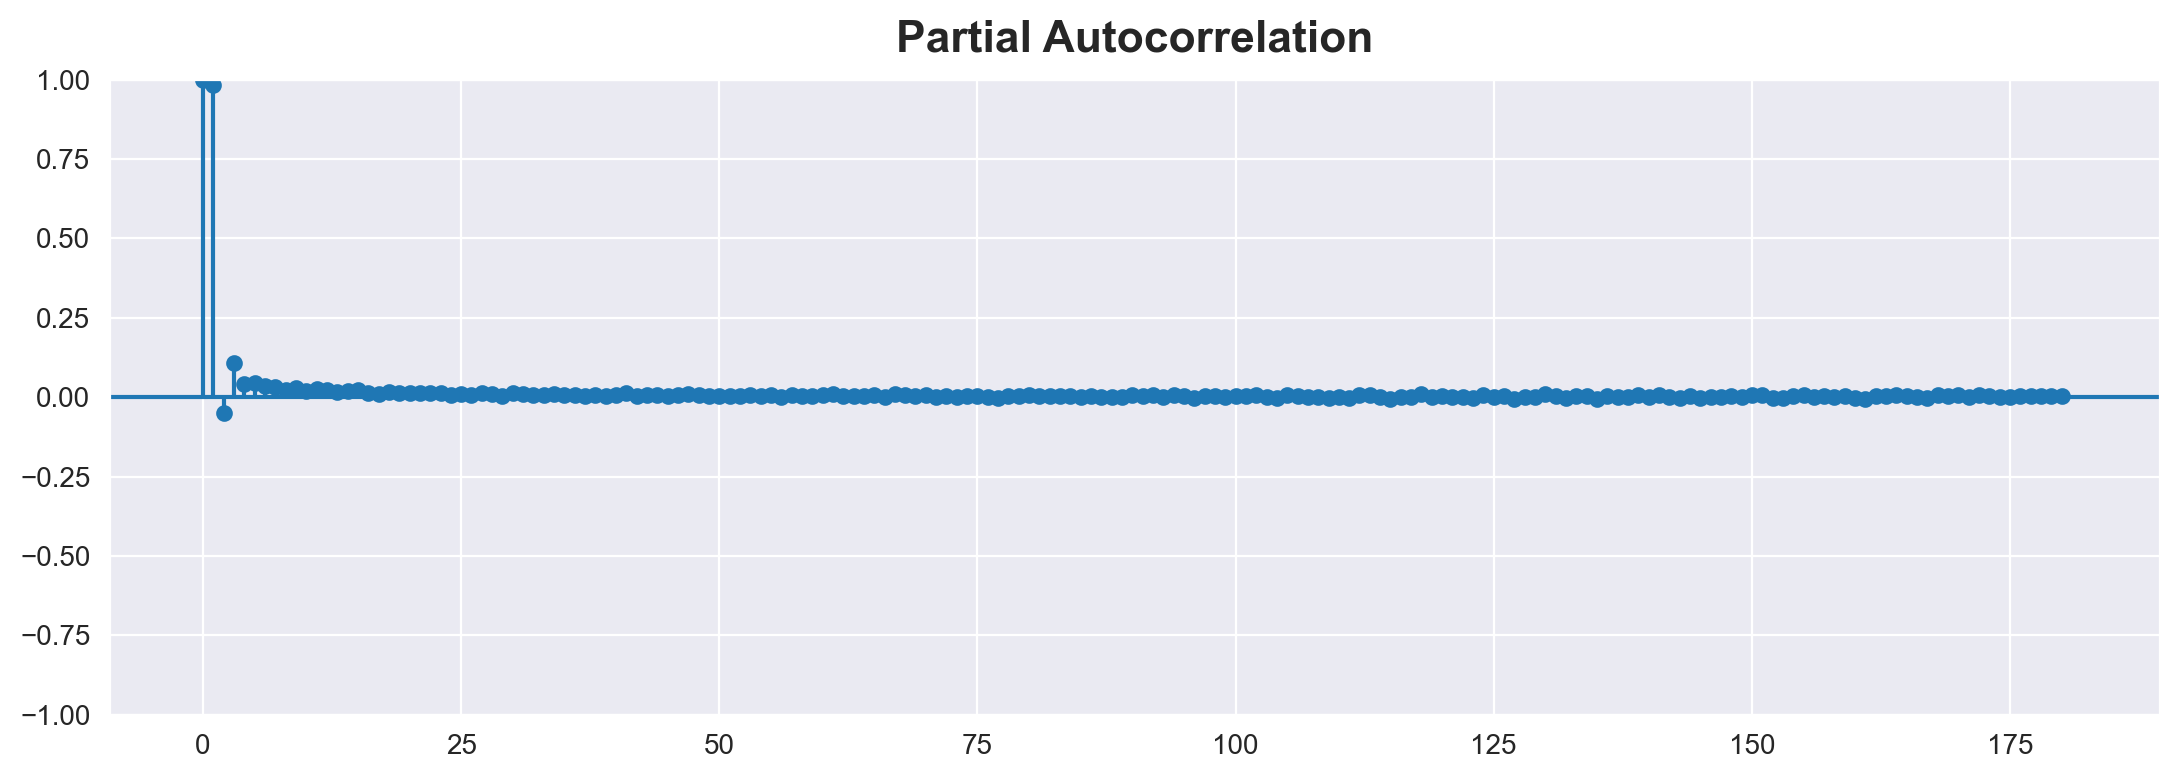

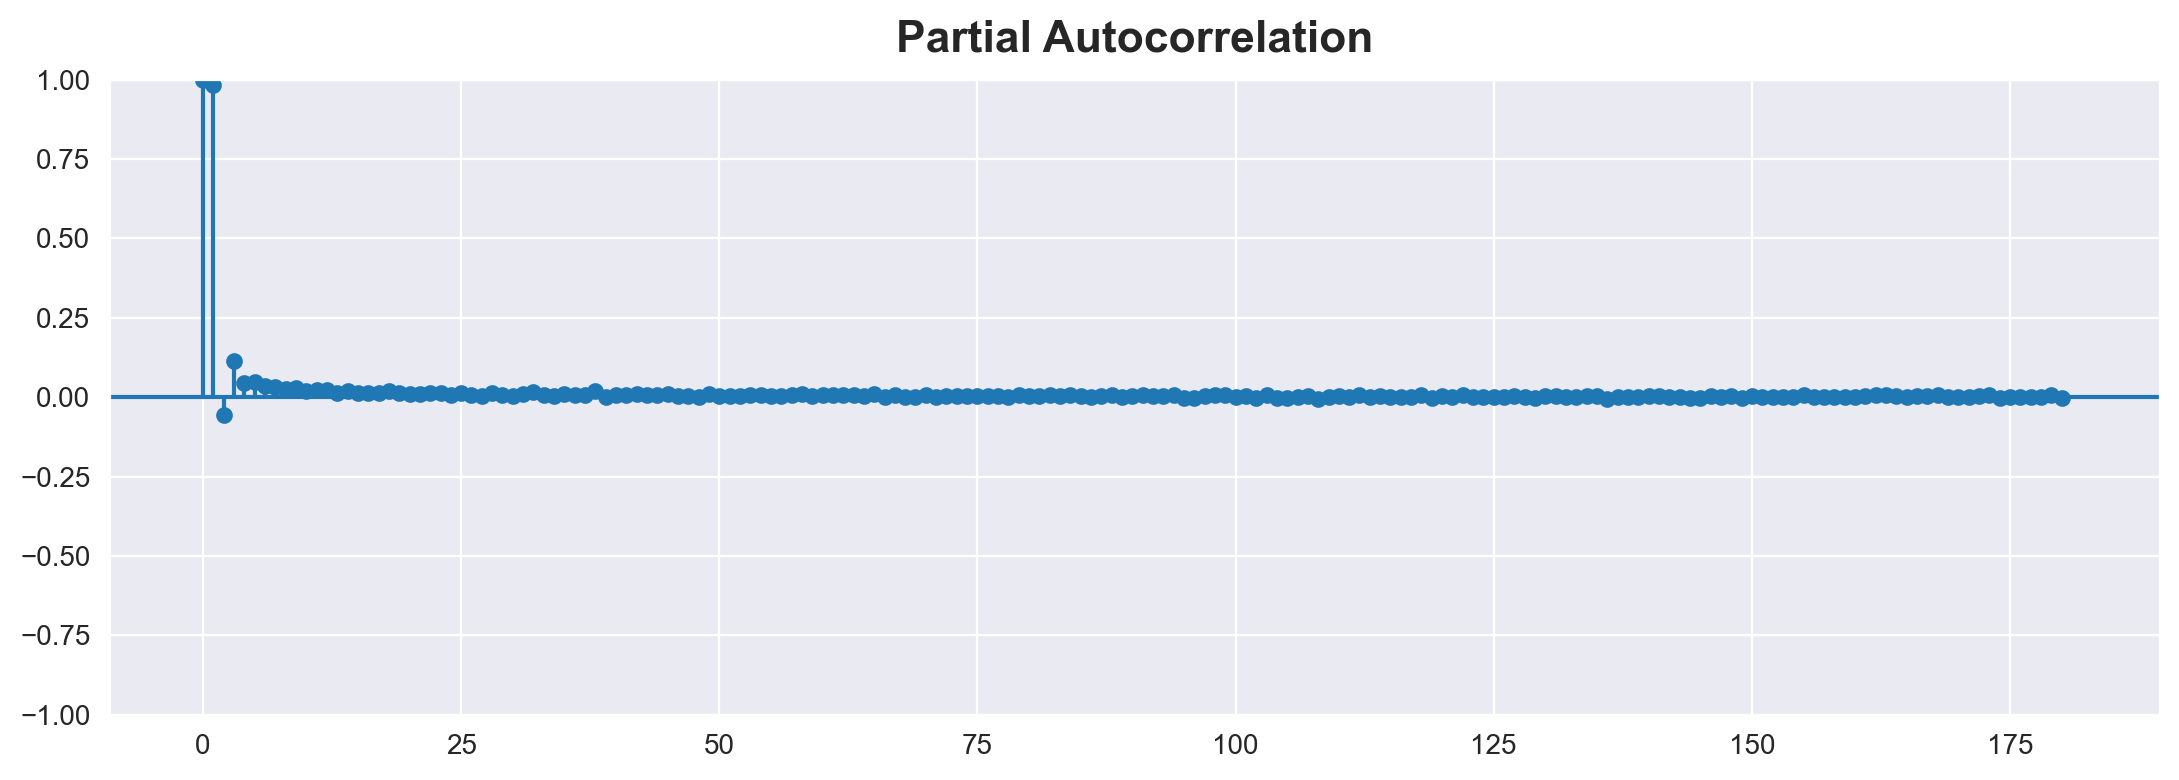

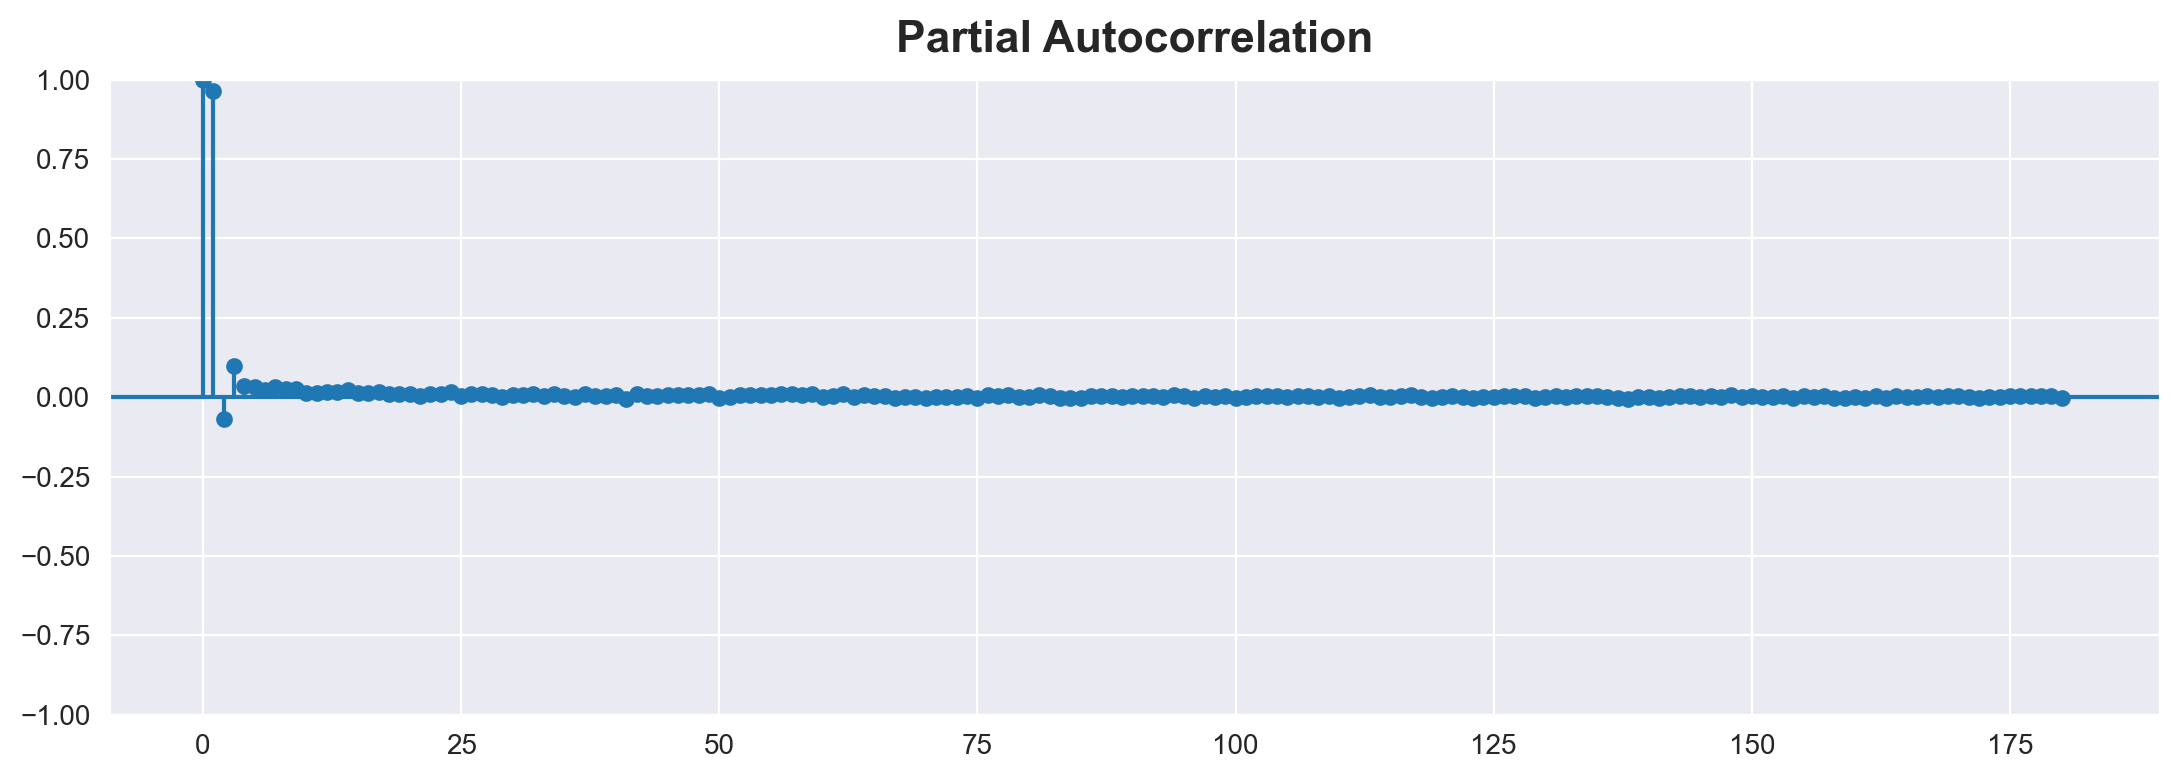

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

data1 = dscovr_df("data_2016.csv")["1"].interpolate().to_numpy()
_ = plot_pacf(data1, lags=180)

data2 = dscovr_df("data_2016.csv")["2"].interpolate().to_numpy()
_ = plot_pacf(data2, lags=180)

data3 = dscovr_df("data_2016.csv")["3"].interpolate().to_numpy()
_ = plot_pacf(data3, lags=180)

In [21]:
data = pd.concat([
    dscovr_df(f"data_{year}.csv").interpolate() for year in range(2016, 2024)
])

180259200

In [25]:
anomalies = data[data["k_index_target"] > 5]
dates = pd.to_datetime(anomalies.index)

In [37]:
print(dates.to_series().groupby(by=[dates.month, dates.year]).count() / 180)

0   0   
1   2022     1.0
2   2023     9.0
3   2017     3.0
    2018     1.0
    2021     2.0
    2022     4.0
    2023     8.0
4   2017     2.0
    2018     2.0
    2022     3.0
    2023     6.0
5   2017     4.0
    2018     2.0
    2019     2.0
    2021     2.0
7   2017     3.0
8   2018     4.0
    2022     3.0
9   2016     4.0
    2017    10.0
    2018     2.0
    2020     1.0
    2022     4.0
10  2016     8.0
    2017     2.0
    2021     2.0
    2022     1.0
11  2017     4.0
    2018     1.0
    2021     6.0
12  2016     1.0
    2022     1.0
Name: 0, dtype: float64
